# feature extraction

- this means leveraginng working model adn learn patterns for our own problems.

`benefits:`
- can leverage existing NN architecture proven too work on problemssimilar to our own data
- can leverage already learned patterns on similar data to ur own that we can adapt those pattern to our own data

In [ ]:
!nvidia-smi

Mon Sep  6 04:33:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# downloading and becoming one with data 
# dataset used: 10% 10_food_classes_from_food

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2021-09-09 11:00:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.114.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   109MB/s    in 1.5s    

2021-09-09 11:00:56 (109 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
# unzip the downloadied file
zip_ref=zipfile.ZipFile('/content/10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/10_food_classes_10_percent.zip' mode='r'>>

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
  print(f'there are{len(dirnames)} dirctories and {len(filenames)} images in {dirpath}.' )

there are2 dirctories and 0 images in 10_food_classes_10_percent.
there are10 dirctories and 0 images in 10_food_classes_10_percent/train.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/sushi.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/fried_rice.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/ramen.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/pizza.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/chicken_wings.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/hamburger.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/steak.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/chicken_curry.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/ice_cream.
there are0 dirctories and 75 images in 10_food_classes_10_percent/train/grilled_salmon.
there are10 dirctories and 0 imag

- from number of images in training path we can observe that we are using only 10% of the total images in original dataset i.e. 75 in training folder

### using data loaders ( preparing the data)
 we will use ImageDataGenerator class to load in our images in batches.

In [12]:
# setting data inpuuts
from tensorflow.keras.preprocessing.image import ImageDataGenerator

INPUT_SHAPE = (224, 224)
BATCH_SIZE=32

train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print('training images:')
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=INPUT_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='categorical')

print('testing images:')
test_data=test_datagen.flow_from_directory(test_dir,
                                                            target_size=INPUT_SHAPE,
                                                            batch_size=BATCH_SIZE,
                                                            class_mode='categorical')



training images:
Found 750 images belonging to 10 classes.
testing images:
Found 2500 images belonging to 10 classes.


### callbacks:
- callbacks are extra functionallity you can add to our model to be performed during or after training. some of most popular callbacks are:
  - tracking experiment with `Tensorboard callback`
  - model checkpoint with `Modelcheckpoint callbacks`
  - stopping a mmodel from training (before it train too long and overfits) with `Early stopping callbacks`

- [callbacks documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)

In [20]:
# craete tensorboard callbacks
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir= dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m5d-%H%M%S')
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'saving tensorboard log files to: {log_dir}')
  return tensorboard_callbacks

### creating model using Tensorflow Hub
tensorflow Hub is a repository of trained machine learning models. It is a place to find a plethora of prre-trained learning model (ready to apply and fine-tune for our own problem.)

Now we're going to do similar process, except the majority of model's layers are going to come from Tensorflow Hub

Site of tensorflow Hub is: http://tfhub.dev/

Browsing the temssorflow Hub page and sorting for imiage classification, we found the following feature vector model link:
efficientnet:  https://tfhub.dev/google/efficientnet/b0/feature-vector/1

Resnet modedl: https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5

**📌Note:** always look does my problem exist on tensorrflow Hub

In [14]:
# lets compare the following two model
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

efficient_url = 'https://tfhub.dev/google/efficientnet/b0/feature-vector/1'


In [15]:
# import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [21]:
# lets create a model() function to create a model from a url
def create_model(model_url, num_classes=10):
  '''
  takes a tensorflow hub url and create a keras sequential model with it.

  Args: 
    model_url: tensorflow hub feature extraction URL.
    num_classes: number of output neurons in the output layers.
    should be equal to number of target classes, default 10.

  returns:
    An uncompiled keras Sequential model with model_url as feature extractor
    layer and dednse output layers with num_classes output neurons
  '''
  # Download the pretrained model and save it as a keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,  # freeze the already llearned patterns.
                                           name='feature_extraction_layer',
                                           input_shape=INPUT_SHAPE+(3,))

  
  # create our own model
  model=tf.keras.Sequential([
                             feature_extractor_layer,
                             layers.Dense(num_classes, activation='softmax', name='output_layer')
                             ])
  return model

#### creating and testing ResNet Tensorflow Hub Feature extraction model

In [22]:
resnet_model=create_model(resnet_url,
                          num_classes=train_data_10_percent.num_classes)
# compiling our resnet model
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [24]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                         experiment_name='resnet50V2'
                                                                         )])

saving tensorboard log files to: tensorflow_hub/resnet50V2/2021095d-110637
Epoch 1/5
24/24 [==============================] - 57s 1s/step - loss: 2.0687 - accuracy: 0.3160 - val_loss: 1.2672 - val_accuracy: 0.5884
Epoch 2/5
24/24 [==============================] - 21s 908ms/step - loss: 0.9515 - accuracy: 0.7040 - val_loss: 0.8829 - val_accuracy: 0.7184
Epoch 3/5
24/24 [==============================] - 21s 912ms/step - loss: 0.6313 - accuracy: 0.8347 - val_loss: 0.7723 - val_accuracy: 0.7524
Epoch 4/5
24/24 [==============================] - 21s 896ms/step - loss: 0.4886 - accuracy: 0.8760 - val_loss: 0.7463 - val_accuracy: 0.7520
Epoch 5/5
24/24 [==============================] - 21s 911ms/step - loss: 0.3993 - accuracy: 0.9013 - val_loss: 0.6963 - val_accuracy: 0.7728


- Our transfer learning featureextractor model out performed ALL of the previous model we built by hand.
- though we only used 10%of the data.

##### Creating loss curves.

In [37]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  '''
  returns seperate loss_curves for training and validation_data
  '''
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='validation_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


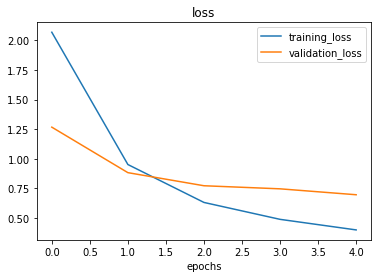

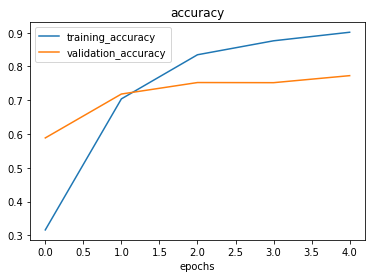

In [38]:
plot_loss_curves(resnet_history)

In [25]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


#### creating and testing EfficientNet80 Tensorflow Hub Feature Extraction model

In [44]:

# creating efficient feature extractor model
efficient_model=create_model(model_url=efficient_url,
                             num_classes=train_data_10_percent.num_classes)

# comppiling efficient model
efficient_model.compile(loss='categorical_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

# Fit efficient modedl to 10% of training data
efficient_history=efficient_model.fit(train_data_10_percent,
                                      epochs=10,
                                      steps_per_epoch=len(train_data_10_percent),
                                      validation_data=test_data,
                                      validation_steps=len(test_data),
                                      callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                             experiment_name='efficientnetb0')])

saving tensorboard log files to: tensorflow_hub/efficientnetb0/2021095d-122450
Epoch 1/10
24/24 [==============================] - 25s 895ms/step - loss: 1.7884 - accuracy: 0.4773 - val_loss: 1.2553 - val_accuracy: 0.7332
Epoch 2/10
24/24 [==============================] - 18s 790ms/step - loss: 1.0286 - accuracy: 0.7867 - val_loss: 0.8531 - val_accuracy: 0.8252
Epoch 3/10
24/24 [==============================] - 19s 805ms/step - loss: 0.7443 - accuracy: 0.8440 - val_loss: 0.6893 - val_accuracy: 0.8440
Epoch 4/10
24/24 [==============================] - 18s 782ms/step - loss: 0.6001 - accuracy: 0.8827 - val_loss: 0.6084 - val_accuracy: 0.8584
Epoch 5/10
24/24 [==============================] - 18s 773ms/step - loss: 0.5074 - accuracy: 0.8960 - val_loss: 0.5542 - val_accuracy: 0.8656
Epoch 6/10
24/24 [==============================] - 18s 785ms/step - loss: 0.4407 - accuracy: 0.9067 - val_loss: 0.5189 - val_accuracy: 0.8684
Epoch 7/10
24/24 [==============================] - 25s 1s/step

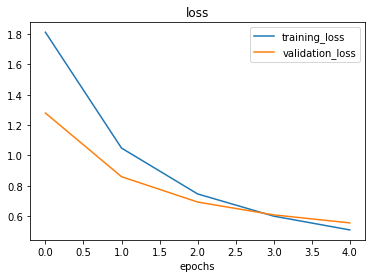

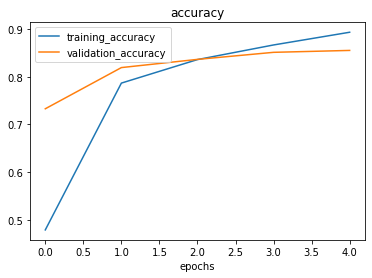

In [43]:
plot_loss_curves(efficient_history)

In [45]:
efficient_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
resnet_model.summary()